**Q1. What is the difference between Ordinal Encoding and Label Encoding? Provide an example of when you might choose one over the other.**

`Ordinal encoding` and `label encoding` are both techniques used to convert categorical data into numerical form so that machine learning algorithms can work with them. However, they are used in different situations and have distinct approaches.

**Ordinal Encoding:**

Ordinal encoding is used when there is an inherent order or ranking among the categories in a categorical feature. In this encoding, each category is assigned a unique integer based on its position in the order. For example, if we have a "Size" feature with categories like "Small," "Medium," and "Large," we can encode them as 0, 1, and 2, respectively, to represent their ordinal relationship.

`Here's an example of ordinal encoding:`

In [1]:
# Import necessary libraries
import pandas as pd

# Create a sample dataset
data = {'Size': ['Small', 'Medium', 'Large', 'Small', 'Large']}
df = pd.DataFrame(data)
print("The Original Dataframe:")
print(df)
print("\t")

# Define the ordinal mapping
size_mapping = {'Small': 0, 'Medium': 1, 'Large': 2}

# Apply ordinal encoding
df['Size_Encoded'] = df['Size'].map(size_mapping)

# Display the DataFrame
print("The Encoded DataFrame:")
print(df)

The Original Dataframe:
     Size
0   Small
1  Medium
2   Large
3   Small
4   Large
	
The Encoded DataFrame:
     Size  Size_Encoded
0   Small             0
1  Medium             1
2   Large             2
3   Small             0
4   Large             2


`We can also use OrdinalEncoder class also:`

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Create a sample dataset
data = {'Size': ['Small', 'Medium', 'Large', 'Small', 'Large']}
df = pd.DataFrame(data)
print("The Original Dataframe:")
print(df)
print("\t")

# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the data
df['Size_Encoded'] = ordinal_encoder.fit_transform(df[['Size']])

# Convert the 'Size_Encoded' column to integer
df['Size_Encoded'] = df['Size_Encoded'].astype(int)

# Display the DataFrame
print("The Encoded DataFrame:")
print(df)

The Original Dataframe:
     Size
0   Small
1  Medium
2   Large
3   Small
4   Large
	
The Encoded DataFrame:
     Size  Size_Encoded
0   Small             2
1  Medium             1
2   Large             0
3   Small             2
4   Large             0


**Label Encoding:**

`Label encoding`, on the other hand, is used when there is no intrinsic order or ranking among the categories in a categorical feature. It simply assigns a unique integer to each category without considering any ordinal relationship. For instance, if you have a "Color" feature with categories like "Red," "Blue," and "Green," you can encode them as 0, 1, and 2, respectively.

`Here's an example of label encoding:`

In [3]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder

# Create a sample dataset
data = {'Color': ['Red', 'Blue', 'Green', 'Red', 'Blue']}
df = pd.DataFrame(data)
print("The Original Dataframe:")
print(df)
print("\t")

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data
df['Color_Encoded'] = label_encoder.fit_transform(df['Color'])

# Display the DataFrame
print("The Encoded DataFrame:")
print(df)

The Original Dataframe:
   Color
0    Red
1   Blue
2  Green
3    Red
4   Blue
	
The Encoded DataFrame:
   Color  Color_Encoded
0    Red              2
1   Blue              0
2  Green              1
3    Red              2
4   Blue              0


**Q2. Explain how Target Guided Ordinal Encoding works and provide an example of when you might use it in a machine learning project.**

`Target Guided Ordinal` Encoding is a technique used in machine learning to encode categorical variables with an ordinal relationship based on the target variable. It is particularly useful when dealing with ordinal categorical data, where the categories have a natural order or ranking.

Let's break down the steps of how Target Guided Ordinal Encoding works and provide an example to illustrate it. We will use Python and matplotlib for visualization.

**Step 1: Understanding the Concept**

- Before we start, let's make sure we understand what an ordinal variable is. An ordinal variable is a categorical variable with ordered categories, meaning there's a clear hierarchy or ranking among the categories. For example, "Low," "Medium," and "High" are ordinal categories because they have a natural order.

**Step 2: Example Data**

- For this example, let's assume we have a dataset of student exam scores and their corresponding performance categories: "Poor," "Average," "Good," and "Excellent." We want to create an ordinal encoding based on the performance category.

In [4]:
import pandas as pd
import numpy as np

data = {
    'Student': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Hannah', 'Ivy', 'Jack'],
    'Exam_Score': [75, 88, 92, 60, 98, 85, 70, 65, 78, 93],
    'Performance': ['Average', 'Good', 'Excellent', 'Poor', 'Excellent', 'Good', 'Average', 'Poor', 'Good', 'Excellent']
}

df = pd.DataFrame(data)
print("The Original DataFRame:")
print(df)

The Original DataFRame:
   Student  Exam_Score Performance
0    Alice          75     Average
1      Bob          88        Good
2  Charlie          92   Excellent
3    David          60        Poor
4      Eve          98   Excellent
5    Frank          85        Good
6    Grace          70     Average
7   Hannah          65        Poor
8      Ivy          78        Good
9     Jack          93   Excellent


**Step 3: Calculate Ordinal Rankings**

- We need to calculate the ordinal ranking of the categories based on the target variable (Performance in this case). We will assign a numerical value to each category, reflecting their ranking.

In [5]:
# Create a mapping of ordinal rankings based on the mean Exam_Score for each category
ordinal_mapping = df.groupby('Performance')['Exam_Score'].mean().sort_values().index
ordinal_mapping = {category: rank for rank, category in enumerate(ordinal_mapping, 1)}
print("The Ranking: ", ordinal_mapping)

The Ranking:  {'Poor': 1, 'Average': 2, 'Good': 3, 'Excellent': 4}


**Step 4: Apply Ordinal Encoding**

- Now that we have the ordinal mapping, we can create a new column in our dataset to represent the ordinal encoding based on the Performance category.

In [6]:
df['Performance_Ordinal'] = df['Performance'].map(ordinal_mapping)
print("The Encoded DataFrame:")
print(df)

The Encoded DataFrame:
   Student  Exam_Score Performance  Performance_Ordinal
0    Alice          75     Average                    2
1      Bob          88        Good                    3
2  Charlie          92   Excellent                    4
3    David          60        Poor                    1
4      Eve          98   Excellent                    4
5    Frank          85        Good                    3
6    Grace          70     Average                    2
7   Hannah          65        Poor                    1
8      Ivy          78        Good                    3
9     Jack          93   Excellent                    4


**Q3. Define covariance and explain why it is important in statistical analysis. How is covariance calculated?**

`Covariance` is a statistical measure that quantifies the degree to which two random variables change together. In simpler terms, it helps us understand the relationship between two sets of data points. It is crucial in statistical analysis because it provides valuable insights into how two variables are related. Positive covariance suggests that when one variable increases, the other tends to increase as well, while negative covariance indicates that when one variable increases, the other tends to decrease. A covariance of zero implies that the two variables are not related.

The formula to calculate the covariance between two variables, X and Y, in a dataset is as follows:

$$\text{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})$$

Where:
- $\text{Cov}(X, Y)$ is the covariance between X and Y.
- $n$ is the number of data points.
- $X_i$ and $Y_i$ are the individual data points.
- $\bar{X}$ is the mean (average) of X.
- $\bar{Y}$ is the mean (average) of Y.

`I will now provide a step-by-step explanation and a Python example;`

Covariance between X and Y: 25.0952380952381
The Covariance Matrix:
[[30.9047619  25.0952381 ]
 [25.0952381  20.57142857]]


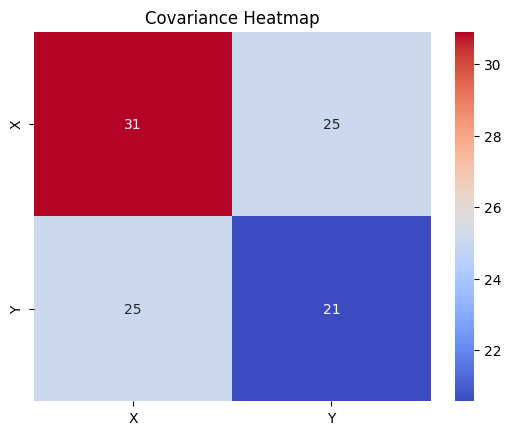

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for X and Y
X = np.array([2, 3, 5, 7, 11, 13, 17])
Y = np.array([1, 3, 4, 6, 9, 10, 14])

# Calculate the mean of X and Y
mean_X = np.mean(X)
mean_Y = np.mean(Y)

# Calculate the covariance
n = len(X)  # Number of data points
covariance = np.sum((X - mean_X) * (Y - mean_Y)) / (n - 1)

print("Covariance between X and Y:", covariance)

# Create a covariance matrix
covariance_matrix = np.cov(X, Y)
print("The Covariance Matrix:")
print(covariance_matrix)

# Create a heatmap
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', xticklabels=['X', 'Y'], yticklabels=['X', 'Y'])
plt.title('Covariance Heatmap')
plt.show()


Let's interpret the results:

1. **Covariance between X and Y: 25.0952380952381**
   
   The covariance between X and Y is approximately 25.10. This positive covariance value indicates that as the values of X tend to increase, the values of Y also tend to increase. In other words, there is a positive linear relationship between X and Y. This means that when X is above its mean, Y is also likely to be above its mean, and when X is below its mean, Y is likely to be below its mean.

2. **The Covariance Matrix:**
   
   The covariance matrix provides a more comprehensive view of the relationship between X and Y, including their self-covariances and the covariance between the two variables.

   - The element at (1, 2) and (2, 1) in the matrix (25.0952381) represents the covariance between X and Y, which we already discussed.
   
   - The element at (1, 1) (30.9047619) is the covariance of X with itself. This is essentially the variance of X. It indicates how much the values of X vary from their mean. In this case, X has a higher variance, which suggests that the values of X are relatively spread out.
   
   - The element at (2, 2) (20.57142857) is the covariance of Y with itself, which is the variance of Y. This variance indicates how much the values of Y vary from their mean. Y has a lower variance compared to X, suggesting that the values of Y are less spread out than the values of X.

**Q4. For a dataset with the following categorical variables: Color (red, green, blue), Size (small, medium, large), and Material (wood, metal, plastic), perform label encoding using Python's scikit-learn library. Show your code and explain the output.**

`Label encoding` is a technique to convert categorical data into numerical format, which is required for many machine learning algorithms. In this example, we will perform label encoding on a dataset with three categorical variables: Color, Size, and Material. We'll use the scikit-learn library in Python to do this.

`Here's a step-by-step explanation with Python code and comments:`

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Create a sample dataset with 10 data points and random values
np.random.seed(15)  # Set a seed for reproducibility

data = {
    'Color': np.random.choice(['red', 'blue', 'green'], size=10),
    'Size': np.random.choice(['small', 'medium', 'large'], size=10),
    'Material': np.random.choice(['wood', 'metal', 'plastic'], size=10)
}

df = pd.DataFrame(data)
print("The Original DataFrame: ")
print(df)
print("\t")

# Initialize the LabelEncoder for each categorical variable (Color, Size, Material)
label_encoder_color = LabelEncoder()
label_encoder_size = LabelEncoder()
label_encoder_material = LabelEncoder()

# Apply label encoding to each categorical column and add new columns with encoded values to the DataFrame
df['Color_Encoded'] = label_encoder_color.fit_transform(df['Color'])
df['Size_Encoded'] = label_encoder_size.fit_transform(df['Size'])
df['Material_Encoded'] = label_encoder_material.fit_transform(df['Material'])

# Display the DataFrame with random values and label-encoded values
print("Label Encoded DataFrame:")
print(df)

The Original DataFrame: 
   Color    Size Material
0    red  medium    metal
1   blue   small  plastic
2    red   large     wood
3   blue   large  plastic
4    red   small    metal
5    red  medium    metal
6   blue  medium     wood
7  green   small    metal
8   blue  medium  plastic
9   blue   small  plastic
	
Label Encoded DataFrame:
   Color    Size Material  Color_Encoded  Size_Encoded  Material_Encoded
0    red  medium    metal              2             1                 0
1   blue   small  plastic              0             2                 1
2    red   large     wood              2             0                 2
3   blue   large  plastic              0             0                 1
4    red   small    metal              2             2                 0
5    red  medium    metal              2             1                 0
6   blue  medium     wood              0             1                 2
7  green   small    metal              1             2                 0
8   b

In [9]:
# Get the mapping of original values to their encoded values using the `classes_` attribute of the LabelEncoder:
color_mapping = dict(zip(label_encoder_color.classes_, label_encoder_color.transform(label_encoder_color.classes_)))
size_mapping = dict(zip(label_encoder_size.classes_, label_encoder_size.transform(label_encoder_size.classes_)))
material_mapping = dict(zip(label_encoder_material.classes_, label_encoder_material.transform(label_encoder_material.classes_)))

print("Color Mapping:", color_mapping)
print("Size Mapping:", size_mapping)
print("Material Mapping:", material_mapping)

Color Mapping: {'blue': 0, 'green': 1, 'red': 2}
Size Mapping: {'large': 0, 'medium': 1, 'small': 2}
Material Mapping: {'metal': 0, 'plastic': 1, 'wood': 2}


- The output will show the mapping of the original categories to their encoded values. This label-encoded dataset can now be used for machine learning algorithms that require numerical input data.
- In this example, we converted categorical data into numerical format using label encoding. Each unique category in each column is assigned a unique integer, making it suitable for machine learning algorithms that require numerical input. 
- We can apply this technique when the categorical variables have an ordinal relationship (e.g., small < medium < large) or when we don't have too many unique categories. If the categories are nominal (no specific order), one-hot encoding may be a better choice.

**Q5. Calculate the covariance matrix for the following variables in a dataset: Age, Income, and Education level. Interpret the results.**

The Original DataFrame: 
   Age  Income    Education  Education_Num
0   25   55000  High School              1
1   30   75000     Bachelor              2
2   35   90000      Masters              3
3   40  120000          PhD              4
4   45  140000     Post Doc              5
	
Formatted Covariance Matrix:
[[50.00 215000.00 10.00]
 [215000.00 934000000.00 43000.00]
 [10.00 43000.00 2.00]]


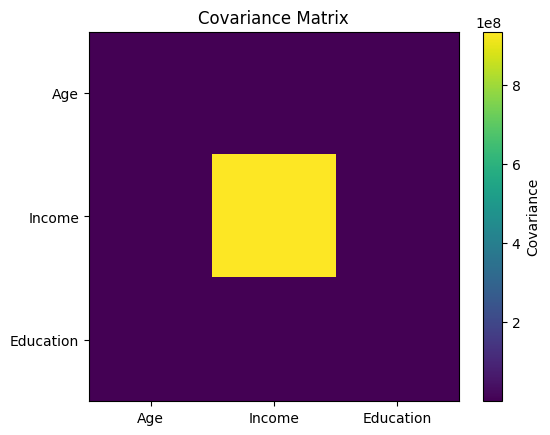

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 3: Example Dataset with Pandas DataFrame
# Age in years, Income in USD per annum
data = pd.DataFrame({
    'Age': [25, 30, 35, 40, 45],
    'Income': [55000, 75000, 90000, 120000, 140000],
    'Education': ['High School', 'Bachelor', 'Masters', 'PhD', 'Post Doc']
})

# Map categorical education levels to numerical values
education_mapping = {'High School': 1, 'Bachelor': 2, 'Masters': 3, 'PhD': 4, 'Post Doc': 5}
data['Education_Num'] = data['Education'].map(education_mapping)

print("The Original DataFrame: ")
print(data)
print("\t")

# Step 4: Calculate Covariance Matrix in scientific notation
# xe+01 means x*10^1 whereas, xe-01 means x*10^-1
covariance_matrix = np.cov(data[['Age', 'Income', 'Education_Num']], rowvar=False, bias=True)
# Display Formatted Covariance Matrix in float notation
np.set_printoptions(formatter={'float': lambda x: "{:.2f}".format(x)})
print("Formatted Covariance Matrix:")
print(covariance_matrix)

# Step 5: Visualize Covariance Matrix
plt.imshow(covariance_matrix, cmap='viridis', interpolation='none')
plt.colorbar(label='Covariance')
plt.title('Covariance Matrix')
plt.xticks([0, 1, 2], ['Age', 'Income', 'Education'])
plt.yticks([0, 1, 2], ['Age', 'Income', 'Education'])
plt.show()

The formatted covariance matrix represents the covariance between the variables 'Age', 'Income', and 'Education_Num' in our dataset. Each row and column in the matrix correspond to one of these variables. Here's how to interpret the result:

1. **Diagonal Elements:**
   - The diagonal elements (top-left to bottom-right) represent the variance of each variable. For example:
      - Variance of 'Age': 50.00
      - Variance of 'Income': 934,000,000.00 (in USD^2 per annum)
      - Variance of 'Education_Num': 2.00

2. **Off-diagonal Elements:**
   - The off-diagonal elements represent the covariance between pairs of variables. For example:
      - Covariance between 'Age' and 'Income': 215,000.00
      - Covariance between 'Age' and 'Education_Num': 10.00
      - Covariance between 'Income' and 'Education_Num': 43,000.00

3. **Interpretation:**
   - A positive covariance indicates a positive relationship between the variables; when one variable increases, the other tends to increase.
   - A negative covariance indicates a negative relationship; when one variable increases, the other tends to decrease.

In our specific matrix:
- The covariance between 'Age' and 'Income' is positive, suggesting a positive relationship between age and income.
- The covariance between 'Age' and 'Education_Num' is also positive, indicating a positive relationship between age and education level.
- The covariance between 'Income' and 'Education_Num' is positive, suggesting a positive relationship between income and education level.
- The actual magnitude of the covariance values is influenced by the scales of the variables. 
- If we're interested in the strength of the relationships, we might want to consider normalizing the data or using correlation coefficients.

**Q6. You are working on a machine learning project with a dataset containing several categorical variables, including "Gender" (Male/Female), "Education Level" (High School/Bachelor's/Master's/PhD), and "Employment Status" (Unemployed/Part-Time/Full-Time). Which encoding method would you use for each variable, and why?**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Creating a sample dataset
data = {'Gender': ['Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female'],
        'Education Level': ['Bachelor\'s', 'Master\'s', 'PhD', 'Bachelor\'s', 'High School', 'PhD', 'Master\'s', 'High School', 'Bachelor\'s', 'Master\'s'],
        'Employment Status': ['Full-Time', 'Part-Time', 'Unemployed', 'Full-Time', 'Part-Time', 'Full-Time', 'Unemployed', 'Part-Time', 'Full-Time', 'Part-Time']}

df = pd.DataFrame(data)
print("The Original DataFrame:")
print(df)

The Original DataFrame:
   Gender Education Level Employment Status
0    Male      Bachelor's         Full-Time
1  Female        Master's         Part-Time
2    Male             PhD        Unemployed
3    Male      Bachelor's         Full-Time
4  Female     High School         Part-Time
5  Female             PhD         Full-Time
6    Male        Master's        Unemployed
7  Female     High School         Part-Time
8    Male      Bachelor's         Full-Time
9  Female        Master's         Part-Time


`One-Hot Encoding` is used for nominal categorical variables (categories with no inherent order). It seems appropriate for the "Gender" column in our case.

In [12]:
# Step 2: Encoding "Gender" using One-Hot Encoding
# Using OneHotEncoder for "Gender"
one_hot_encoder = OneHotEncoder(drop=None, sparse=False)
gender_encoded = one_hot_encoder.fit_transform(df[['Gender']]).astype(int)
gender_encoded_df = pd.DataFrame(gender_encoded, columns=['Gender_OneHotEnc_Male', 'Gender_OneHotEnc_Female'])

# Adding the encoded columns to the DataFrame
df = pd.concat([df, gender_encoded_df], axis=1)
# Displaying the updated DataFrame
print(df[['Gender', 'Gender_OneHotEnc_Male', 'Gender_OneHotEnc_Female']])

   Gender  Gender_OneHotEnc_Male  Gender_OneHotEnc_Female
0    Male                      0                        1
1  Female                      1                        0
2    Male                      0                        1
3    Male                      0                        1
4  Female                      1                        0
5  Female                      1                        0
6    Male                      0                        1
7  Female                      1                        0
8    Male                      0                        1
9  Female                      1                        0


C:\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


- I have used `Ordinal Encoding` for the `Education Level` column, which is suitable since there is a clear order in the education levels.
- I have used `Label Encoding` for the `Employment Status` column, which is suitable when there is no ordinal relationship between categories. However, I noticed that the "Employment Status" column appears to be nominal (categories with no inherent order, like "Full-Time," "Part-Time," and "Unemployed").

In [13]:
# Step 3: Encoding "Education Level" using Ordinal Encoding
education_level_mapping = {'High School': 0, 'Bachelor\'s': 1, 'Master\'s': 2, 'PhD': 3}
df['EducationLevel_OrdinalEncoded'] = df['Education Level'].map(education_level_mapping)
# Displaying the updated DataFrame
print(df[['Education Level', 'EducationLevel_OrdinalEncoded']])
print("\t")
# Step 4: Encoding "Employment Status" using Label Encoding
label_encoder = LabelEncoder()
df['EmploymentStatus_LabelEncoded'] = label_encoder.fit_transform(df['Employment Status'])
# Displaying the updated DataFrame
print(df[['Employment Status', 'EmploymentStatus_LabelEncoded']])


  Education Level  EducationLevel_OrdinalEncoded
0      Bachelor's                              1
1        Master's                              2
2             PhD                              3
3      Bachelor's                              1
4     High School                              0
5             PhD                              3
6        Master's                              2
7     High School                              0
8      Bachelor's                              1
9        Master's                              2
	
  Employment Status  EmploymentStatus_LabelEncoded
0         Full-Time                              0
1         Part-Time                              1
2        Unemployed                              2
3         Full-Time                              0
4         Part-Time                              1
5         Full-Time                              0
6        Unemployed                              2
7         Part-Time                              1


**Q7. You are analyzing a dataset with two continuous variables, "Temperature" and "Humidity", and two categorical variables, "Weather Condition" (Sunny/Cloudy/Rainy) and "Wind Direction" (North/South/East/West). Calculate the covariance between each pair of variables and interpret the results.**

In [14]:
import pandas as pd

# Creating a sample dataset
# Temerature in degree celsious
# Humidity in percentage
data = {
    'Temperature': [25, 30, 20, 22, 28, 18, 24, 26, 21, 23],
    'Humidity': [50, 60, 45, 48, 55, 42, 49, 52, 46, 47],
    'Weather_Condition': ['Sunny', 'Cloudy', 'Rainy', 'Sunny', 'Cloudy', 'Rainy', 'Sunny', 'Cloudy', 'Rainy', 'Sunny'],
    'Wind_Direction': ['North', 'South', 'East', 'West', 'North', 'South', 'East', 'West', 'North', 'South']
}

df = pd.DataFrame(data)
print("The Original DataFrame:")
print(df)

The Original DataFrame:
   Temperature  Humidity Weather_Condition Wind_Direction
0           25        50             Sunny          North
1           30        60            Cloudy          South
2           20        45             Rainy           East
3           22        48             Sunny           West
4           28        55            Cloudy          North
5           18        42             Rainy          South
6           24        49             Sunny           East
7           26        52            Cloudy           West
8           21        46             Rainy          North
9           23        47             Sunny          South


The Covariance Matrix:
             Temperature   Humidity
Temperature    13.566667  18.800000
Humidity       18.800000  27.155556
	


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17532\2438142818.py:4: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cov_matrix = df.cov()


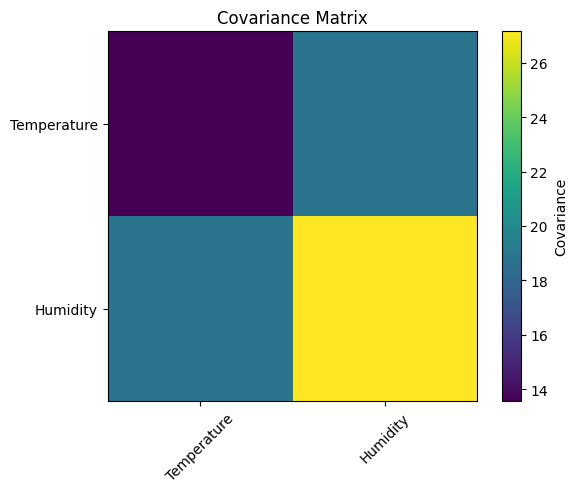

In [15]:
import numpy as np

# Calculating the covariance matrix
cov_matrix = df.cov()
print("The Covariance Matrix:")
print(cov_matrix)
print("\t")

# Visualizing the covariance matrix using imshow
plt.imshow(cov_matrix, cmap='viridis', interpolation='none')
plt.title('Covariance Matrix')
plt.colorbar(label='Covariance')
plt.xticks(np.arange(len(cov_matrix.columns)), cov_matrix.columns, rotation=45)
plt.yticks(np.arange(len(cov_matrix.index)), cov_matrix.index)
plt.show()

`Covariance` is a measure of how two variables change together. The covariance is a measure of the degree to which two variables change together. It is typically calculated for numeric variables, and its interpretation is straightforward in the context of continuous data. However, for categorical variables, covariance might not be a suitable measure because categorical variables represent categories or labels rather than numerical values.

1. The positive covariances indicate a positive relationship between the variables, meaning that when one variable increases or decreases from its mean, the other variable also tends to increase or decrease. The magnitudes of the covariances can be challenging to interpret directly, so it's often useful to normalize these values using correlation coefficients for a standardized measure of the strength and direction of the relationship.

2. It can be useful for categorical data if we want to compare the frequencies or proportions of different categories. However, there are some challenges and limitations when using covariance for categorical data.

   - One challenge is how to encode the categorical data into numeric values. There are different methods for encoding categorical data, such as one-hot encoding, ordinal encoding, frequency encoding, etc. Each method has its own advantages and disadvantages, and may affect the covariance calculation in different ways. For example, one-hot encoding creates binary variables for each category, which may result in a sparse matrix and high dimensionality. Ordinal encoding assigns numeric values based on the order of the categories, which may introduce artificial ranking and distance among the categories. Frequency encoding assigns numeric values based on the frequency of the categories, which may reduce the variability and information of the data. Therefore, you need to choose an appropriate encoding method that suits your data and research question.

   - Another challenge is how to interpret the covariance values for categorical data. Covariance can range from negative to positive infinity, depending on the scale and variance of the variables. Therefore, covariance is not standardized and not comparable across different variables or datasets. A common way to overcome this problem is to use correlation, which is a normalized version of covariance that ranges from -1 to 1. Correlation can indicate the strength and direction of the linear relationship between two variables. However, correlation may not capture the nonlinear or complex relationships that may exist in categorical data. Moreover, correlation may not be meaningful for some types of categorical data, such as nominal or binary data, where the order and distance of the categories are arbitrary or irrelevant.

   - A limitation of using covariance or correlation for categorical data is that they may not reflect the true association or dependence between the variables. Covariance and correlation are based on the assumption of linearity, which means that the variables change proportionally to each other. However, this assumption may not hold for categorical data, where the variables may have different patterns or interactions that are not linear. For example, two categorical variables may have a high covariance or correlation, but they may be independent or confounded by a third variable. Alternatively, two categorical variables may have a low covariance or correlation, but they may have a strong association or dependence that is nonlinear or conditional. Therefore, we need to be careful and critical when using covariance or correlation for categorical data, and supplement them with other methods or tests that can capture the nature and complexity of the data.

In [16]:
from scipy.stats import chi2_contingency

# Selecting only the categorical columns from the DataFrame
categorical_columns = df.select_dtypes(include=['object']).columns

# Creating an empty matrix to store chi-squared p-values
chi2_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# Calculating chi-squared p-values for each pair of categorical variables
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            contingency_table = pd.crosstab(df[col1], df[col2])
            _, p_value, _, _ = chi2_contingency(contingency_table)
            chi2_matrix.loc[col1, col2] = p_value

# Displaying the chi-squared p-values matrix
print("Chi-squared P-values Matrix:")
print(chi2_matrix)


Chi-squared P-values Matrix:
                  Weather_Condition Wind_Direction
Weather_Condition               NaN       0.924736
Wind_Direction             0.924736            NaN


The Chi-squared P-values Matrix we provided shows the p-values resulting from chi-squared tests for association between the two categorical variables: "Weather_Condition" and "Wind_Direction." A low p-value suggests a significant association.

Here's the interpretation:

1. **Weather_Condition vs. Wind_Direction:**
   - **Weather_Condition to Wind_Direction:** The p-value is 0.924736, which is quite high. A high p-value suggests that there is no significant association between "Weather_Condition" and "Wind_Direction." In other words, the distribution of wind direction does not depend significantly on the weather condition, and vice versa.

   - **Wind_Direction to Weather_Condition:** The p-value is also 0.924736. Again, this high p-value indicates that there is no significant association between "Wind_Direction" and "Weather_Condition." The direction of the wind does not depend significantly on the weather condition.